In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import shutil
import glob

In [2]:
TRAIN_DIR = "./DATASET"
ORG_DIR = "train/men"
ORG_DIR2 = "train/women"
CLASS = ['men','women']

In [3]:
for C in CLASS:
    DEST = os.path.join(TRAIN_DIR,C)

    if not os.path.exists(DEST):
        os.makedirs(DEST)

    org_path = ORG_DIR if C == 'men' else ORG_DIR2

    for img_path in glob.glob(os.path.join(org_path, "*.jpg")):
        img_name = os.path.basename(img_path)
        shutil.copy(img_path, os.path.join(DEST, img_name))

# MODEL


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

from tensorflow import keras


In [5]:
base_model = InceptionV3(input_shape=(256,256,3), include_top= False)

In [6]:
for layer in base_model.layers:
    layer.trainable = False

In [7]:
X = Flatten()(base_model.output)
X = Dense(units=2, activation= 'sigmoid')(X)

model = Model(base_model.input, X)

model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 127, 127,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 127, 127,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 125, 125,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 125, 125,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 62, 62,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 62, 62,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 60, 60,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 60, 60,    │          0 │ batch_normalizat

 Total params: 21,950,242 (83.73 MB)

 Trainable params: 147,458 (576.01 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

# Pre-Process data using Data Generator

In [8]:
train_datagen = ImageDataGenerator(featurewise_center=True,
                                    rotation_range=0.4, width_shift_range=0.3,
                                    horizontal_flip= True,
                                      preprocessing_function= preprocess_input,
                                      zoom_range= 0.4, shear_range= 0.4)
train_data = train_datagen.flow_from_directory(directory = 'DATASET',
                                                target_size=(256,256),
                                               batch_size=36)

Found 220 images belonging to 2 classes.


In [9]:
train_data.class_indices

{'men': 0, 'women': 1}

# Visualizing the data

In [10]:
t_img, label = train_data.__next__()

In [11]:
def plotImages(img_arr, label):
    for idx, img in enumerate(img_arr):
        if idx <= 10:
            plt.figure(figsize=(5,5))
            plt.imshow(img)
            plt.title(img.shape)
            plt.axis = False
            plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


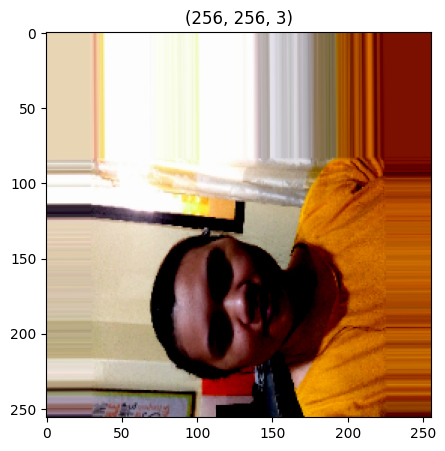

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


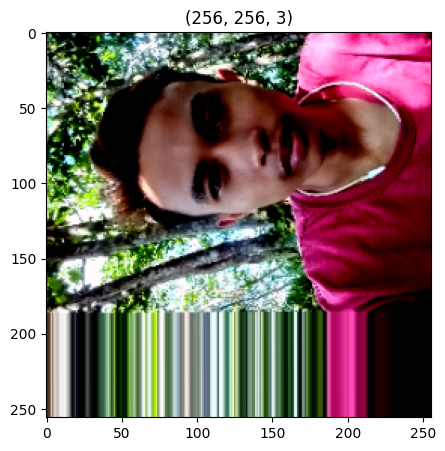

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


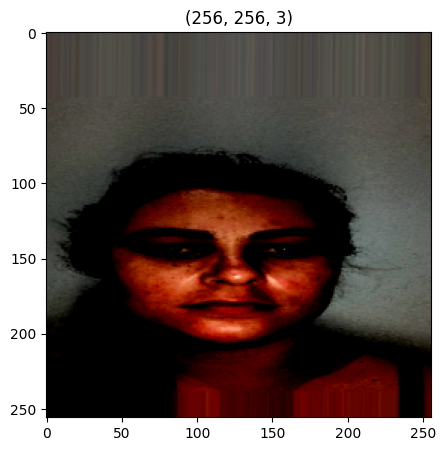

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


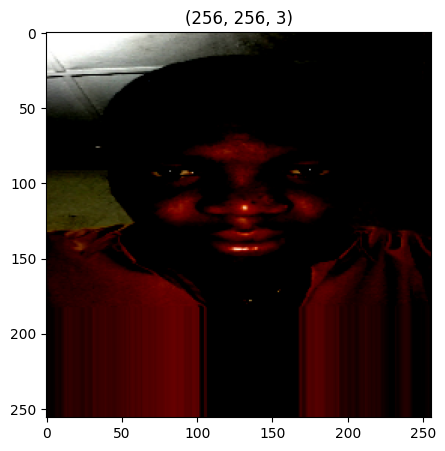

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


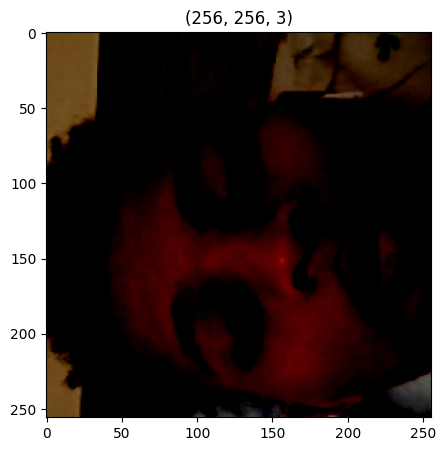

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


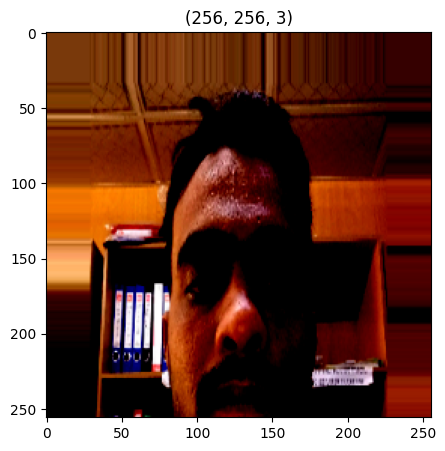

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


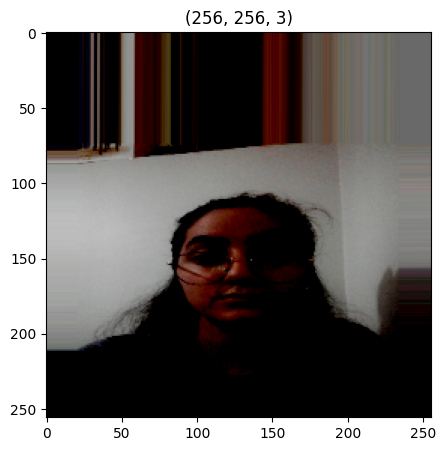

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


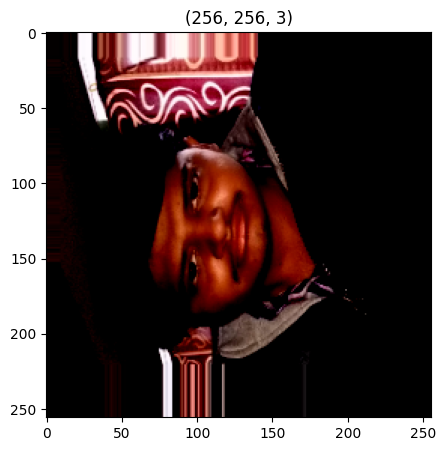

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


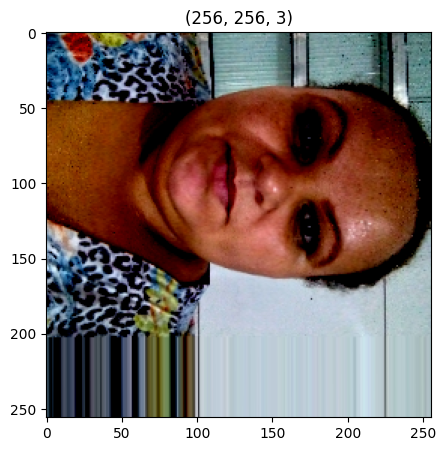

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


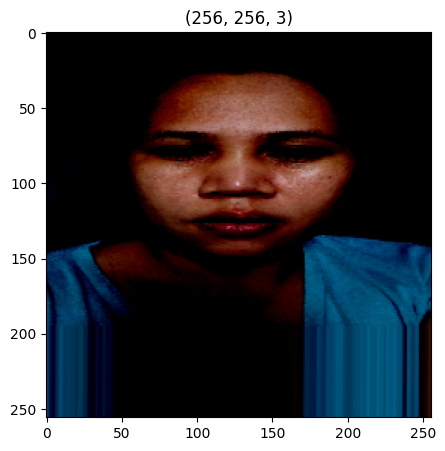

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


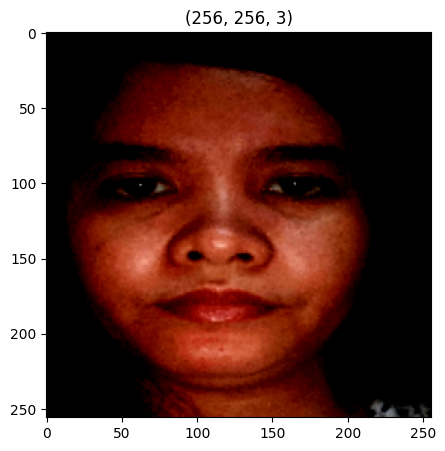

In [12]:
plotImages(t_img, label)

# Model Check Point

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint(filepath= "best_model.h5.keras",
                     monitor="accuracy",
                     verbose= 1,
                     save_best_only= True)
es = EarlyStopping(monitor= "accuracy",
                    min_delta= 0.01,
                      patience= 5,
                        verbose= 1)

cb = [mc,es]

In [14]:
his = model.fit(train_data,
                 steps_per_epoch= 10,
                   epochs= 30,
                     callbacks= cb)

Epoch 1/30
 7/10 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4867 - loss: 6.7416
Epoch 1: accuracy improved from -inf to 0.47273, saving model to best_model.h5.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 855ms/step - accuracy: 0.4825 - loss: 6.8754
Epoch 2/30
 7/10 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5432 - loss: 4.8837   
Epoch 2: accuracy improved from 0.47273 to 0.52273, saving model to best_model.h5.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 719ms/step - accuracy: 0.5371 - loss: 4.9175
Epoch 3/30
 7/10 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6458 - loss: 2.8240  
Epoch 3: accuracy improved from 0.52273 to 0.64545, saving model to best_model.h5.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 773ms/step - accuracy: 0.6457 - loss: 2.7581
Epoch 4/30
 7/10 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7600 - loss: 2.0058  
Epoch 4: accuracy improved from 0.64545 to 0.77273, saving model to best_model.h5.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 780ms/step - accuracy: 0.7638 - loss: 1.8912
Epoch 5/

In [15]:
from keras.models import load_model

model = load_model("best_model.h5.keras")

h = his.history
h.keys()

dict_keys(['accuracy', 'loss'])

Text(0.5, 1.0, 'Loss and Acccuracy')

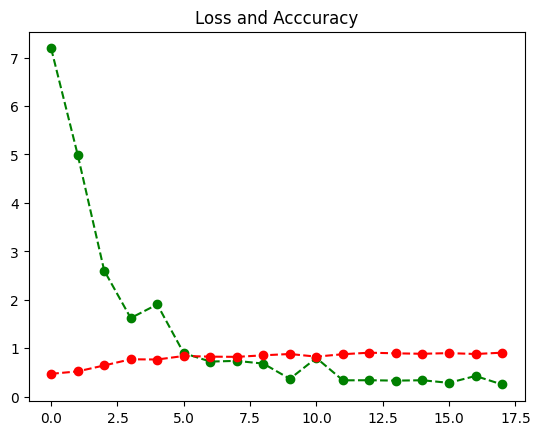

In [16]:
plt.plot(h['loss'], 'go--')
plt.plot(h['accuracy'], 'go--', c = "red",)

plt.title("Loss and Acccuracy")

# Validate our model


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image is of women


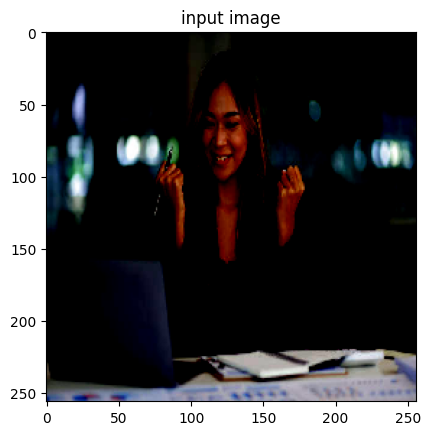

In [17]:
path = "test/b.jpg"
img = load_img(path, target_size=(256,256))

i = img_to_array(img)
i = preprocess_input(i)
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

if pred == 0:
    print("The image is of men")
else:
    print("The image is of women")

#display
plt.imshow(input_arr[0])
plt.title("input image")
plt.axis = False
plt.show()

# GRAD - CAM


In [18]:
def get_img_array(img_path):
    img = load_img(path, target_size=(256,256))
    img = img_to_array(img)
    img = preprocess_input(img)

    img = np.array([i])

    return img

In [19]:
import tensorflow as tf

In [20]:
def make_gracam_heatmap( img_arr, model, last_conv_layer_name, pred_index = None):
    last_conv_layer_output = model.get_layer(last_conv_layer_name).output

    grad_model = tf.keras.models.Model(
        model.input, [last_conv_layer_output, model.output[0]]  # Loại bỏ dấu ngoặc vuông ở đây
    )
    
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_arr)

        if pred_index is None:
            pred_index = tf.argmax(preds[0])

        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)

    pooles_grads = tf.reduce_mean(grads, axis = (0,1,2))

    last_conv_layer_output = last_conv_layer_output[0]

    heatmap = last_conv_layer_output @ pooles_grads[..., tf.newaxis]

    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0)/ tf.math.reduce_max(heatmap)
    return heatmap.numpy()


# Mask HeatMap on Image

In [21]:
import matplotlib.cm as cm
from IPython.display import Image, display


In [22]:
def save_and_display_gradcam(img_path, heatmap, cam_path ="cam.jpg", alpha= 0.4):
    img = img_to_array(load_img(img_path))

    heatmap = np.uint8(255*heatmap)

    jet = cm.get_cmap("jet")

    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    superiposed_img = jet_heatmap * alpha + img
    superiposed_img = keras.preprocessing.image.array_to_img(superiposed_img)

    superiposed_img.save(cam_path)

    display(Image(cam_path))

In [23]:
def image_prediction_and_visualization(path,last_conv_layer_name = "conv2d_93", model = model):

    img_array = get_img_array(path)

    heatmap = make_gracam_heatmap(img_array, model, last_conv_layer_name)

    plt.title("the heat map of the image is ")
    plt.imshow(heatmap)
    plt.show()

    pred = np.argmax(model.predict(preprocess_input(img_array)))
    print()
    print()
    print()
    if pred == 0:
        print("The image is of Men")
    else:
        print("The image is of Women")

    print()
    print()
    print()
    print("image with heatmap representing region on interest")

    # function call
    save_and_display_gradcam(path, heatmap)

    print()
    print("The original input image")
    print()

    a = plt.imread(path)
    plt.imshow(a, cmap = "gray")
    plt.title("Original image")
    plt.show()

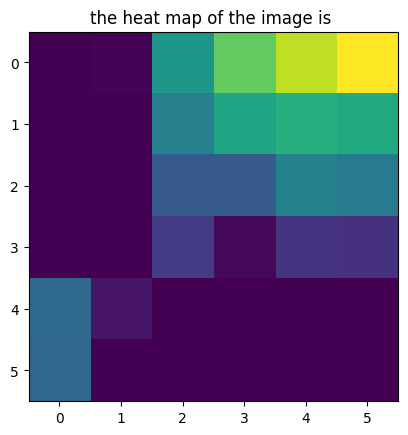

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step



The image is of Women



image with heatmap representing region on interest


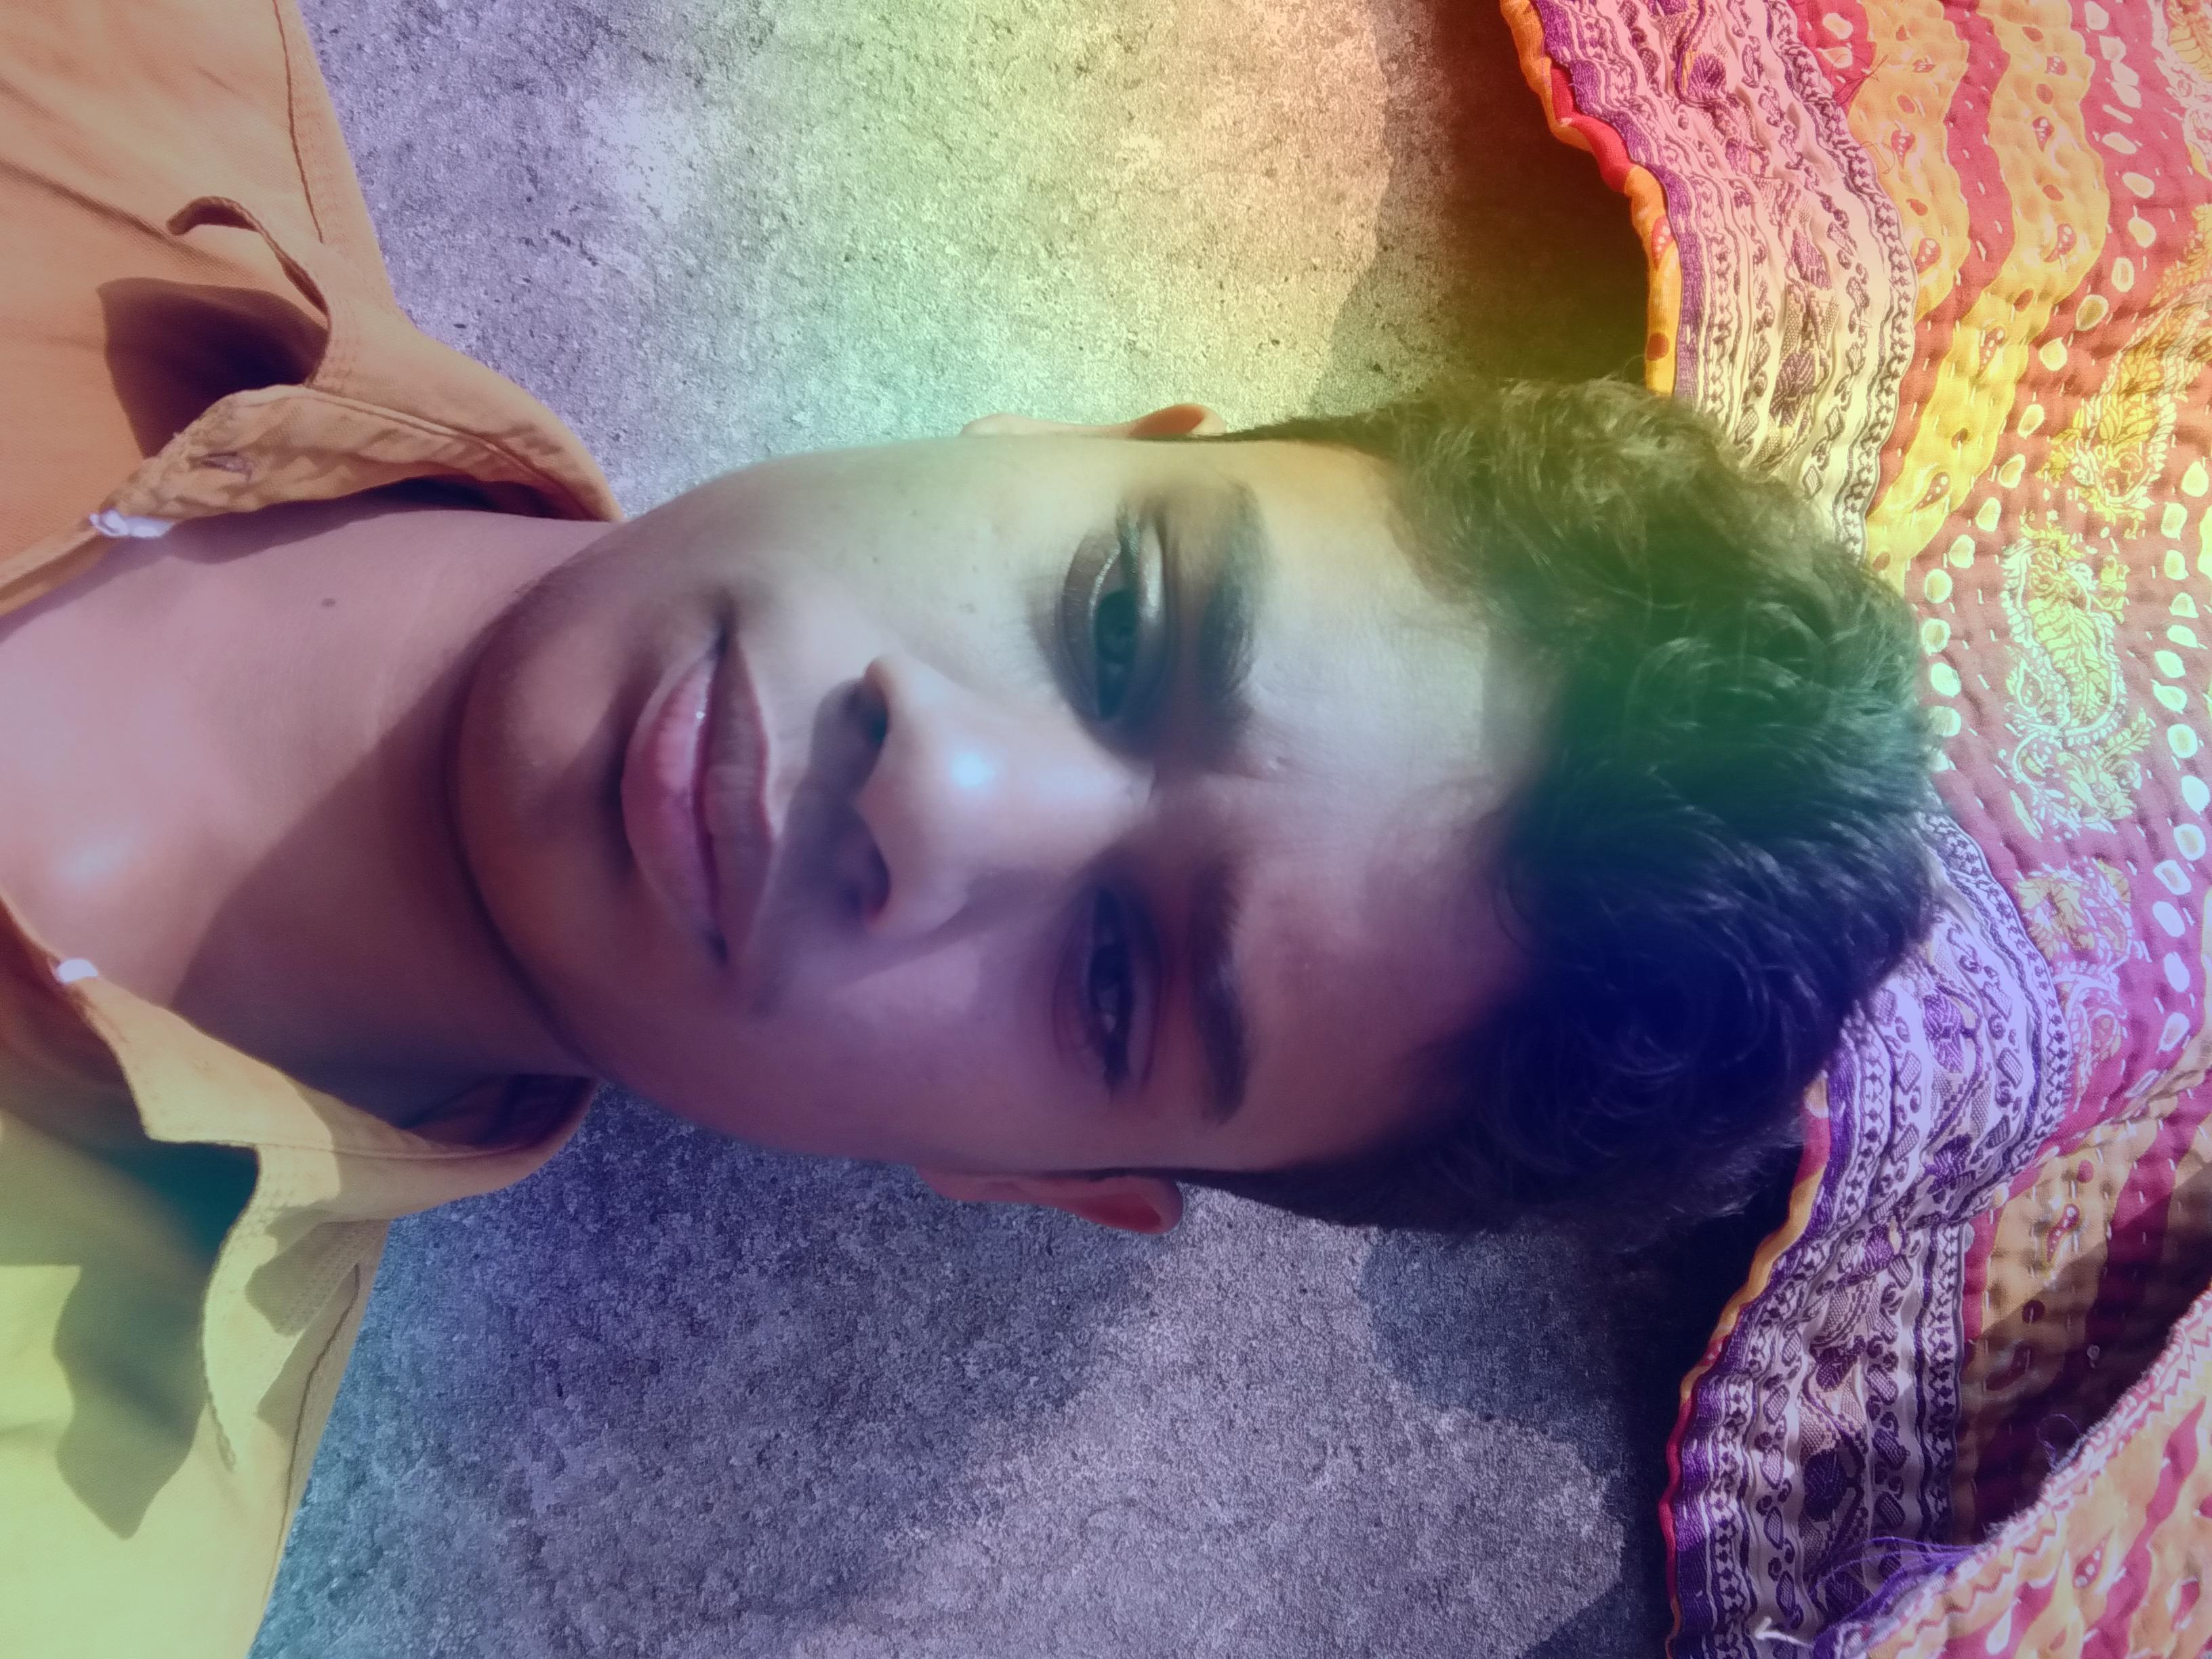


The original input image



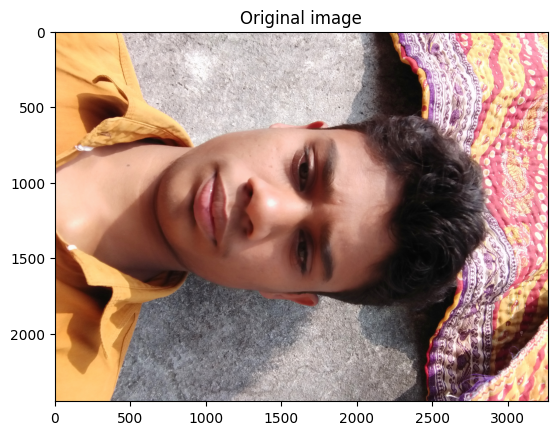

In [24]:
# predictions
path = "test/men/123.jpg"

image_prediction_and_visualization(path)